# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [2]:
historical_df  = pd.read_csv('data/lsoa-historical.csv')
recent_df = pd.read_csv('data/lsoa-recent.csv')

In [3]:
historical_df.head()

,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,201903,201904,201905,201906,201907,...,202012,202101,202102,202103,202104,202105,202106,202107,202108,202109
0,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Arson,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,1,2,0,1,0,...,0,1,1,0,0,1,1,0,0,0
2,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Burglary Business and Community,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Domestic Burglary,1,0,3,1,0,...,1,1,0,0,0,0,0,0,0,0
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Drug Trafficking,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
recent_df.head()

,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,202110,202111,202112,202201,202202,...,202212,202301,202302,202303,202304,202305,202306,202307,202308,202309
0,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,0,0,1,2,1,...,0,0,0,1,1,0,0,2,0,0
1,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Domestic Burglary,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Drug Trafficking,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Possession of Drugs,1,3,2,5,2,...,0,0,0,0,0,0,1,0,2,0
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,Dangerous Driving,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Lets merge these two datasets
df = pd.merge(historical_df, recent_df, on=['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category'], how='outer').fillna(0).sort_index(axis = 1)
df.head()

,201004,201005,201006,201007,201008,201009,201010,201011,201012,201101,...,202305,202306,202307,202308,202309,Borough,LSOA Code,LSOA Name,Major Category,Minor Category
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Arson and Criminal Damage,Arson
1,1.0,3.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Arson and Criminal Damage,Criminal Damage
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Burglary,Burglary Business and Community
3,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,...,0.0,0.0,0.0,1.0,0.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Burglary,Domestic Burglary
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Drug Offences,Drug Trafficking


In [6]:
# Data is in monthly format. If you want to aggregate to yearly to analyse yearly trends.

def aggregate_to_yearly(df:pd.DataFrame) -> pd.DataFrame:

    yearly_df = df.fillna(0).copy()

    # Loop through unique years present in the dataset
    years = {col[:4] for col in yearly_df.columns if col.isdigit()}

    for year in years:
        # List columns for that year
        monthly_columns = [col for col in yearly_df.columns if col.startswith(year)]
        
        # Sum the monthly columns and create a new yearly column
        yearly_df[year] = yearly_df[monthly_columns].sum(axis=1)
        
        yearly_df.drop(monthly_columns, axis=1, inplace=True)

    return yearly_df.sort_index(axis = 1)

yearly_df = aggregate_to_yearly(df)
yearly_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Borough,LSOA Code,LSOA Name,Major Category,Minor Category
0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Arson and Criminal Damage,Arson
1,9.0,4.0,7.0,6.0,8.0,7.0,7.0,5.0,12.0,6.0,4.0,5.0,6.0,4.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Arson and Criminal Damage,Criminal Damage
2,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Burglary,Burglary Business and Community
3,13.0,17.0,15.0,12.0,10.0,10.0,7.0,12.0,15.0,13.0,5.0,4.0,3.0,2.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Burglary,Domestic Burglary
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,Barking and Dagenham,E01000006,Barking and Dagenham 016A,Drug Offences,Drug Trafficking


# EDA

## Analysing crime category distribution

In [7]:
df['Major Category'].unique()

array(['Arson and Criminal Damage', 'Burglary', 'Drug Offences',
       'Miscellaneous Crimes Against Society', 'Possession of Weapons',
       'Public Order Offences', 'Robbery', 'Theft', 'Vehicle Offences',
       'Violence Against the Person'], dtype=object)

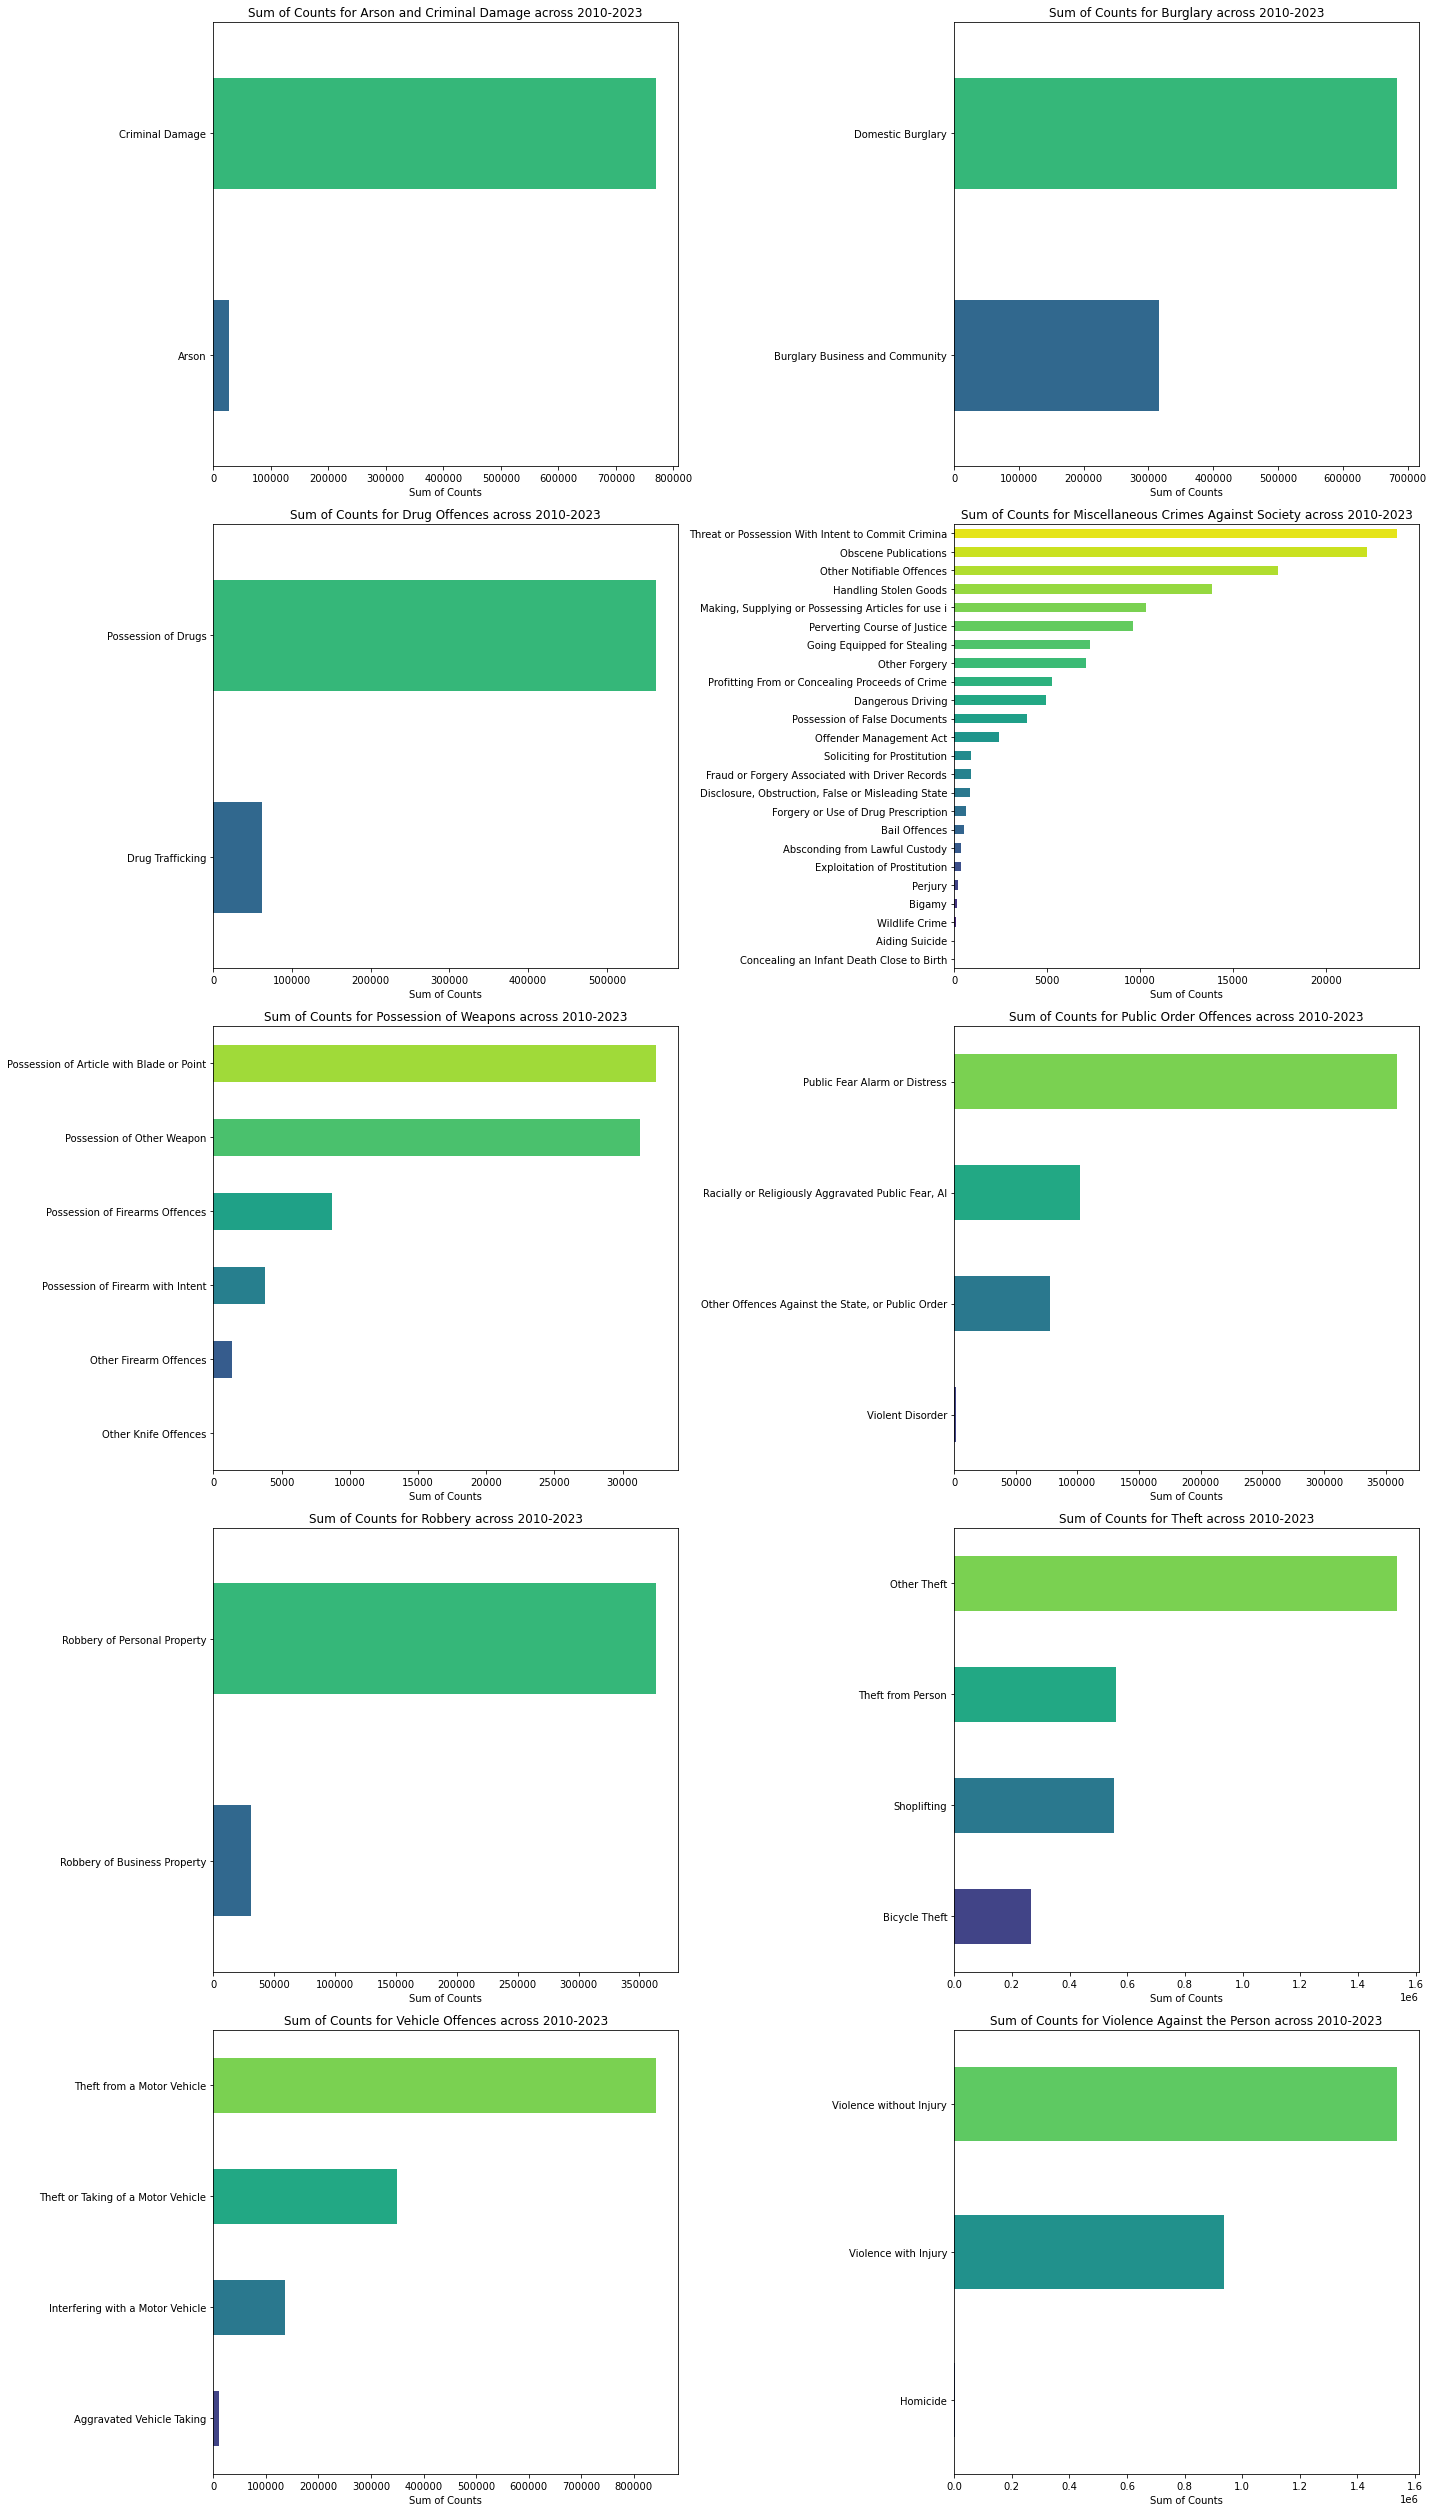

In [14]:
'''
Number of Major Categories, and there Minor Categories from 2010 to 2023
'''

# Getting unique major categories
major_categories = df['Major Category'].unique()

# Number of rows and columns for the subplot grid
n_rows = len(major_categories) // 2 + len(major_categories) % 2
n_cols = 2

# Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 7 * n_rows))

for i, category in enumerate(major_categories):
    # Filtering data for each major category
    major_cat = df[df['Major Category'] == category]

    # Grouping by minor category and summing
    grouped_data = major_cat.groupby(by='Minor Category').sum()

    # Plotting
    ax = axes[i // n_cols, i % n_cols]
    grouped_data.sum(axis=1).sort_values().plot(kind='barh', ax=ax, color=sns.color_palette("viridis", len(grouped_data)))
    ax.set_title(f'Sum of Counts for {category} across 2010-2023')
    ax.set_xlabel('Sum of Counts')
    ax.set_ylabel('')

# Adjusting layout
plt.subplots_adjust()
plt.tight_layout()

plt.show()

## Timeseries of crime types

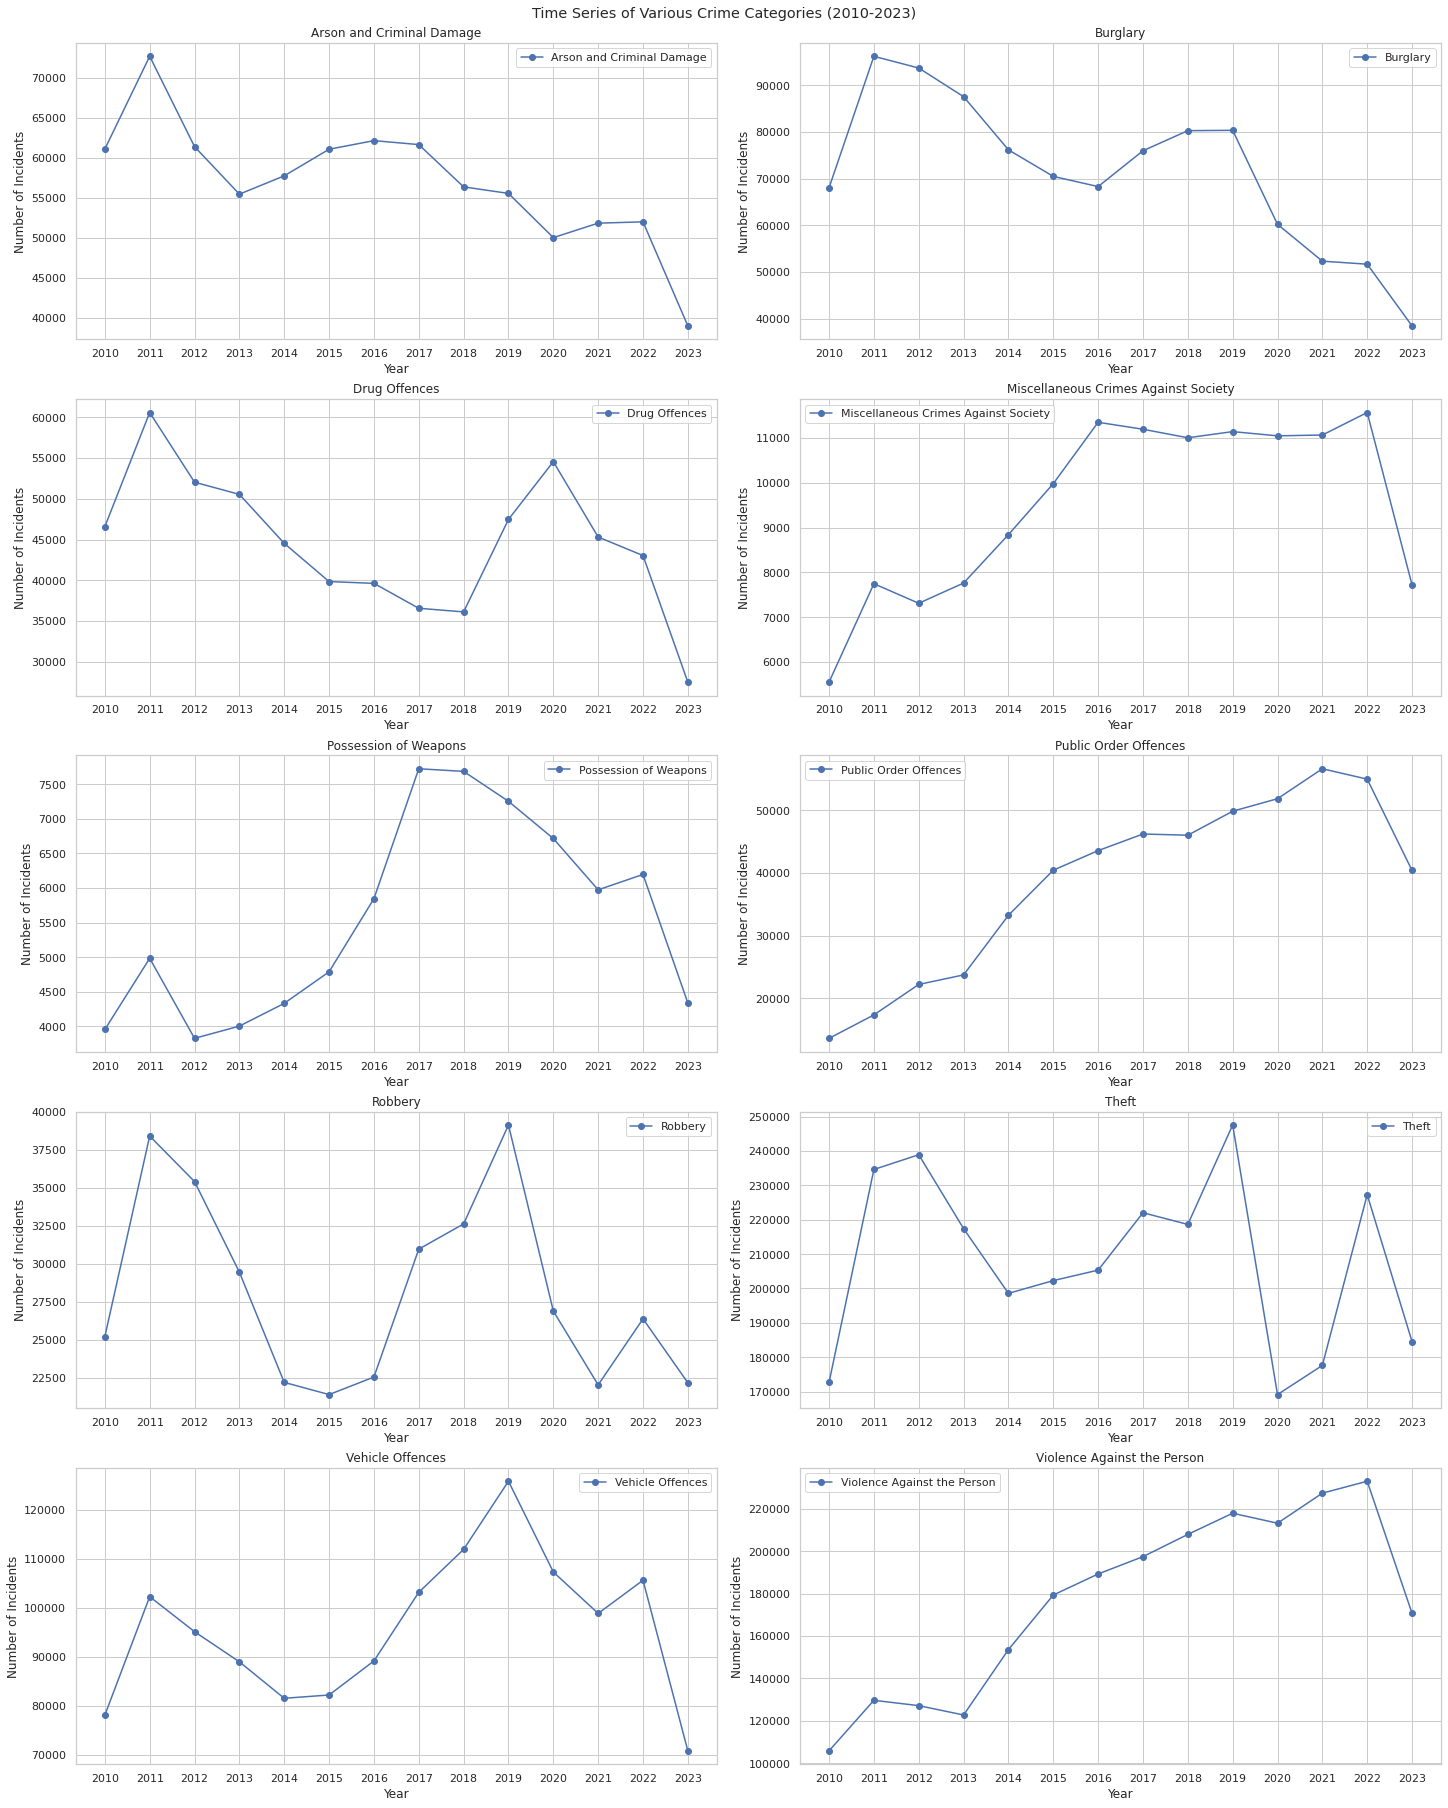

In [76]:
# Timeseries of each Major Category. What are trends of each major category like?
grouped = df.groupby(by=['Major Category']).agg('sum')
grouped.head()

grouped_yearly = aggregate_to_yearly(grouped)
grouped_yearly = grouped_yearly.transpose()

# Determining the number of rows and columns for the subplots
n_categories = grouped_yearly.shape[1]
n_cols = 2
n_rows = n_categories // n_cols + (n_categories % n_cols > 0)

# Creating the grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), constrained_layout=True)
fig.suptitle("Time Series of Various Crime Categories (2010-2023)")

# Flattening the axes array for easy indexing
axes = axes.flatten()

# Looping through each crime category to create individual plots
for i, category in enumerate(grouped_yearly.columns):
    ax = axes[i]
    ax.plot(grouped_yearly.index, grouped_yearly[category], marker='o', label=category)
    ax.set_title(category)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Incidents")
    ax.set_xticks(grouped_yearly.index)
    ax.grid(visible=True)
    ax.legend()

# Hiding unused subplots if n_categories is odd
if n_categories % n_cols > 0:
    axes[-1].axis('off')

plt.show()

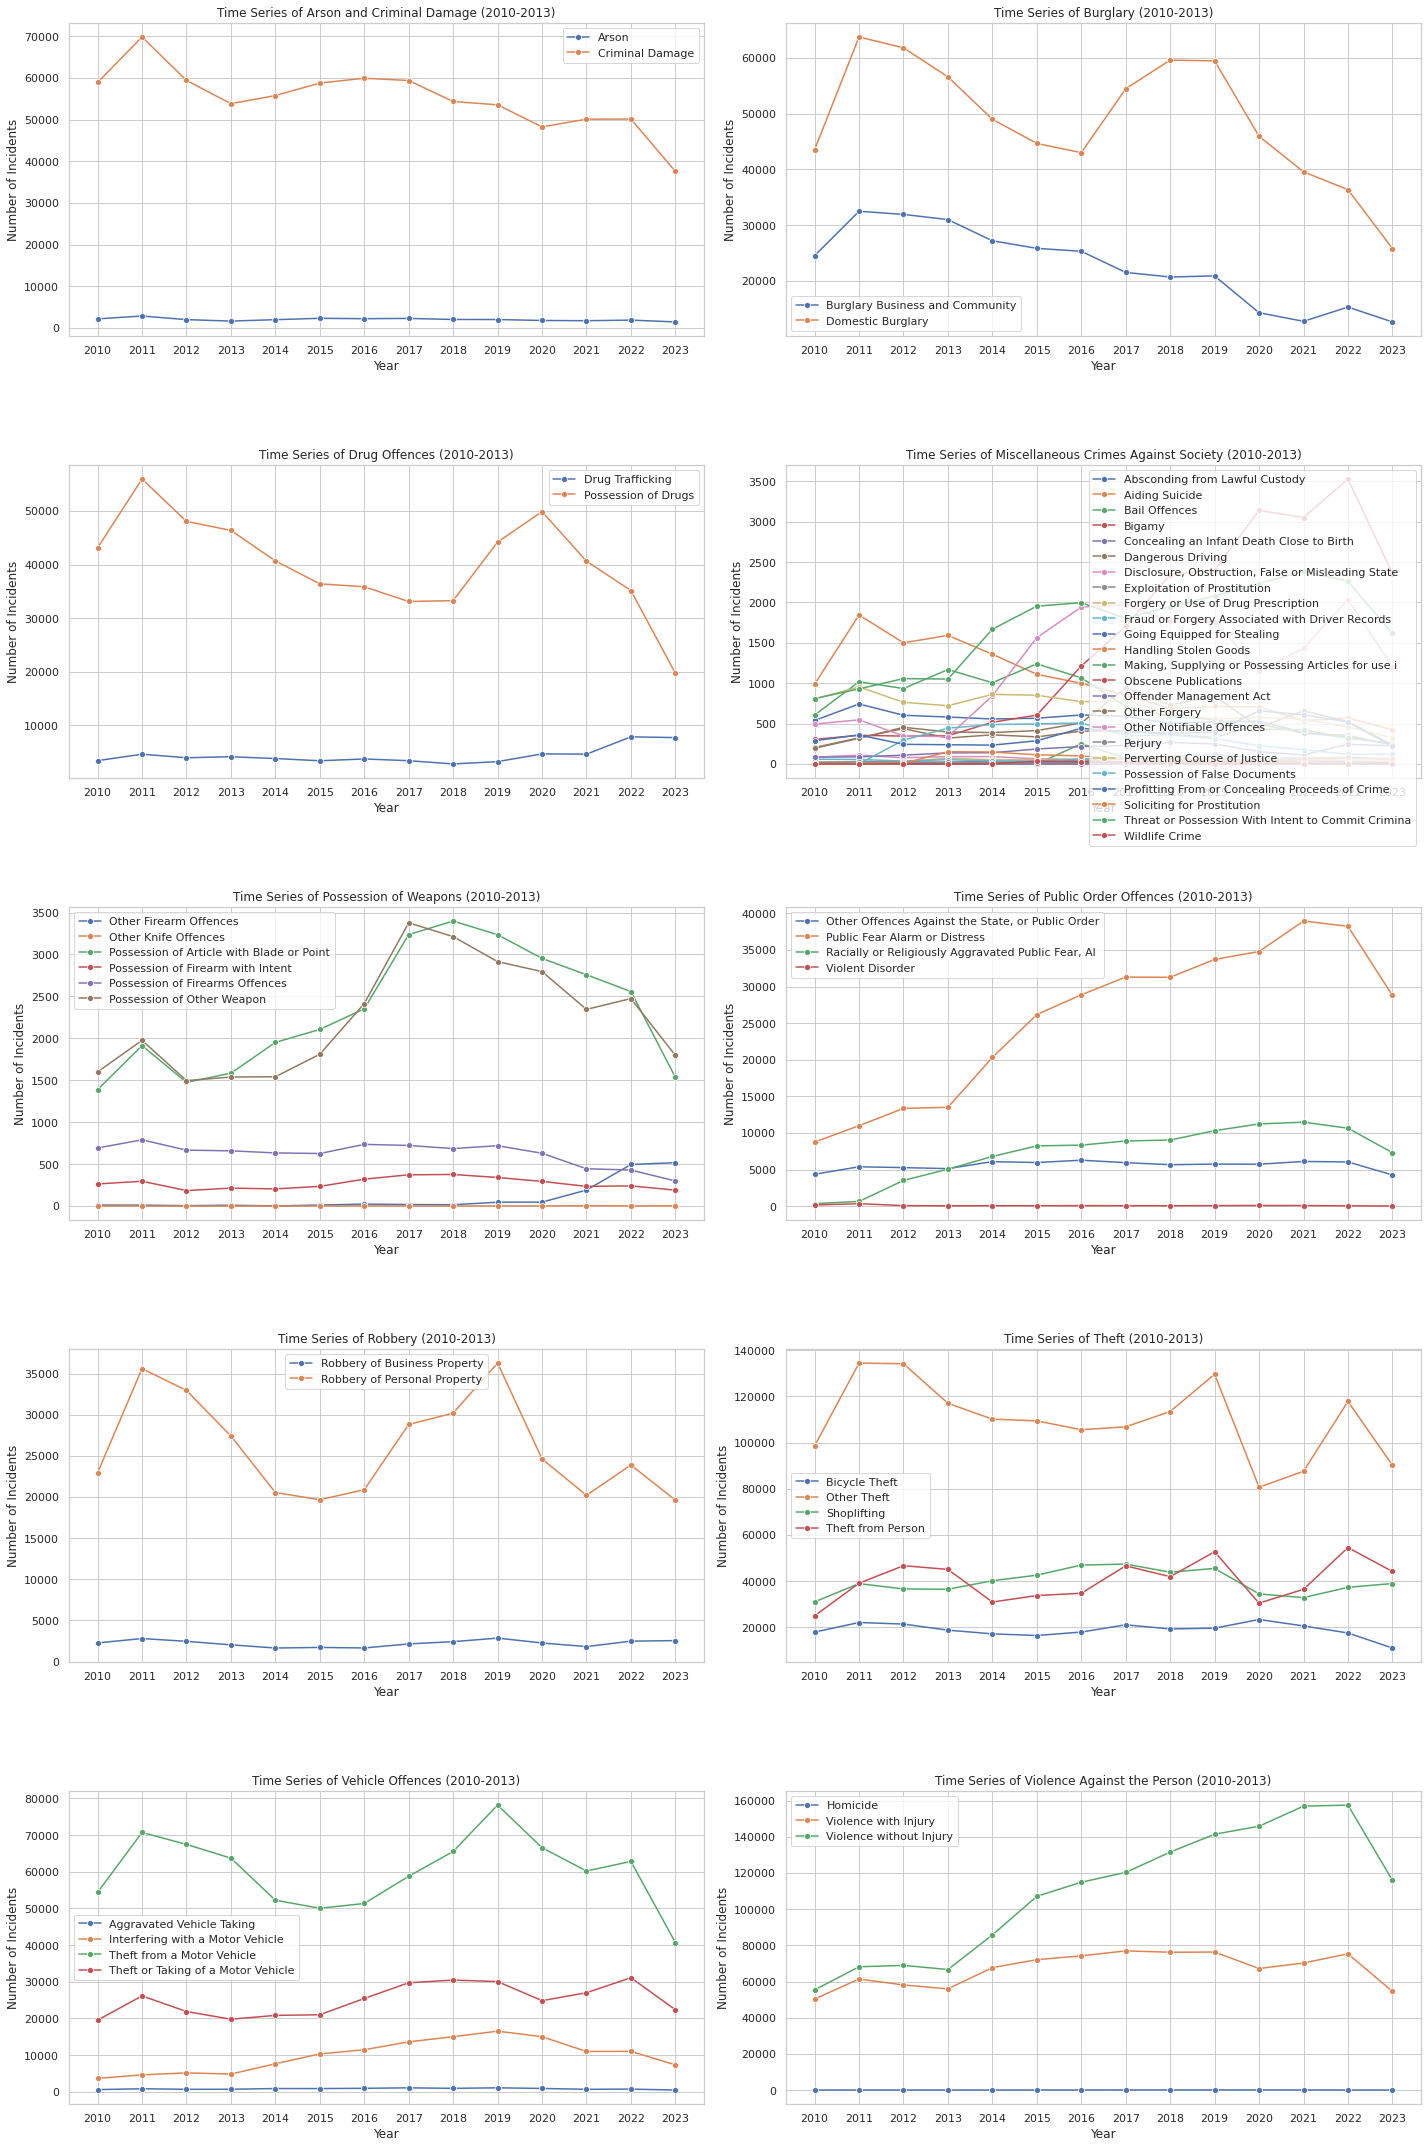

In [78]:
# Timeseries of each Major Category. What are trends of each major category like?
grouped = df.groupby(by=['Major Category', 'Minor Category']).agg('sum')
grouped.head()

grouped_yearly = aggregate_to_yearly(grouped)
#grouped_yearly = grouped_yearly.transpose()

major_cat = df['Major Category'].unique()

# Assuming 'major_cat' contains unique major categories and 'grouped_yearly' is your DataFrame
n_categories = len(major_cat)

# Determine the number of rows needed for the grid
n_rows = n_categories // 2 + n_categories % 2
n_cols = 2

# Creating a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each major category
for i, category in enumerate(major_cat):
    # Retrieve data for the current category
    data = grouped_yearly.loc[category].transpose()

    # Plotting each column in the current subplot
    for column in data.columns:
        sns.lineplot(x=data.index, y=data[column], ax=axes[i], marker='o', label=column)

    # Customizing the subplot
    axes[i].set_title(f'Time Series of {category} (2010-2013)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Incidents')
    axes[i].set_xticks(data.index)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

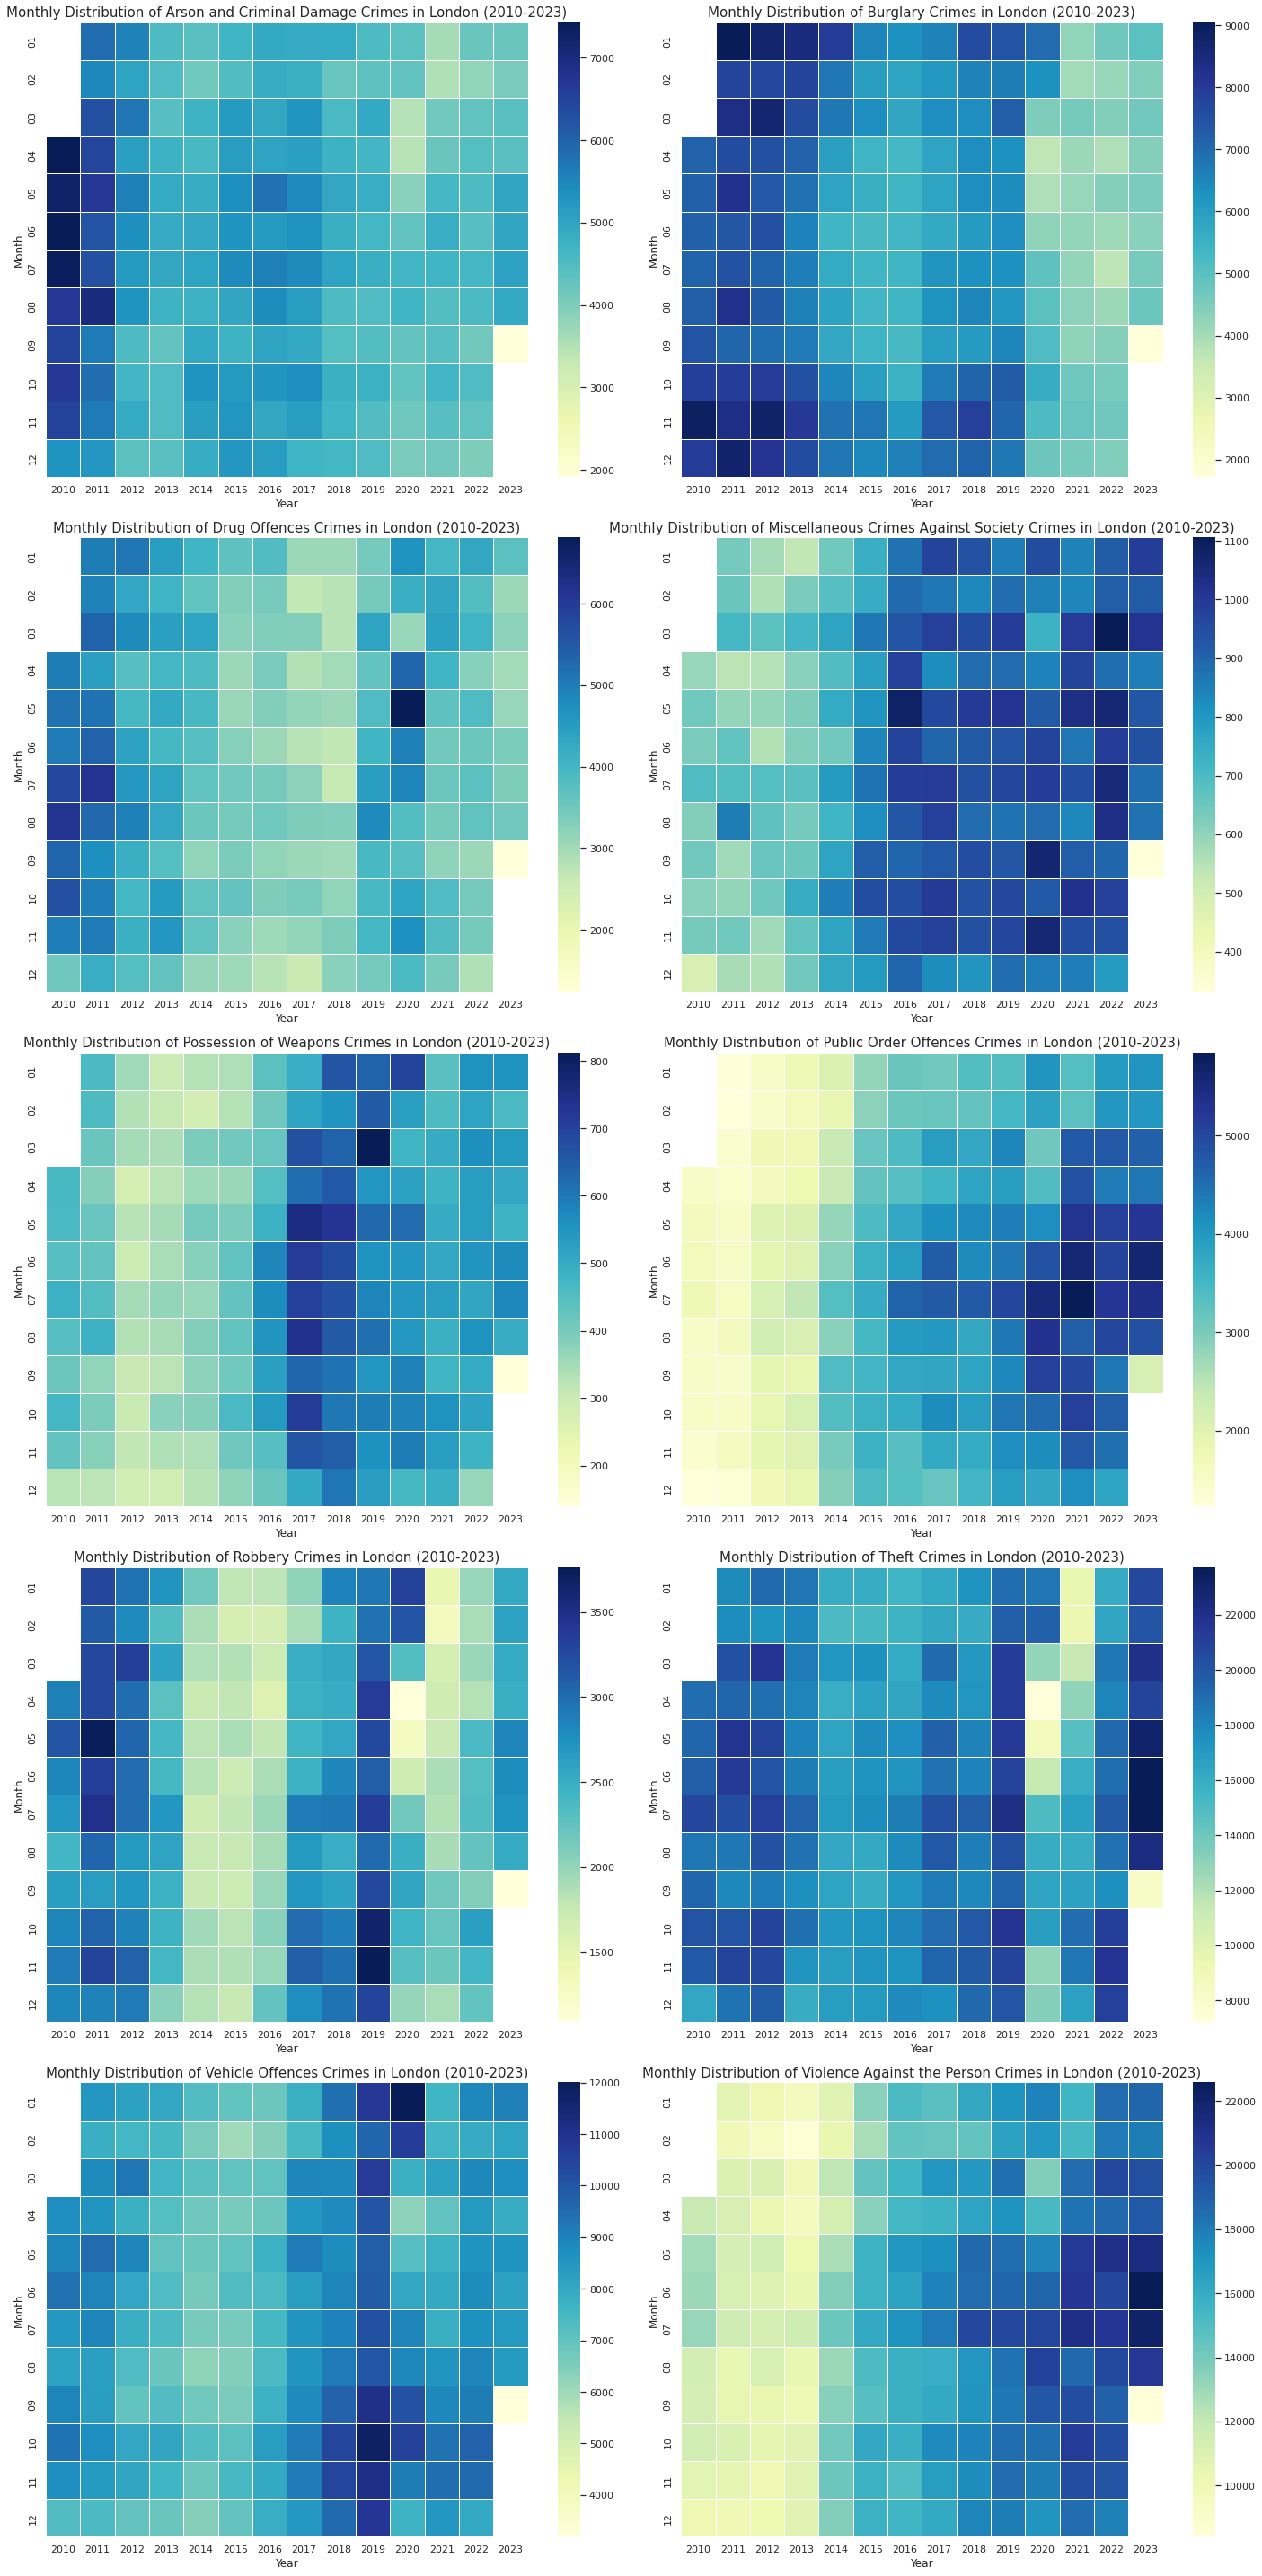

In [97]:
# Determine the number of rows needed for the grid
n_categories = len(major_cat)
n_rows = n_categories // 2 + n_categories % 2
n_cols = 2

# Creating a figure with a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each major category
for i, cat in enumerate(major_cat):
    # Filter data for the current category
    filted_data = df[df['Major Category'] == cat]
    grouped = filted_data.groupby(by=['Borough']).agg('sum').sum()
    grouped_df = pd.DataFrame(grouped).reset_index()
    grouped_df['Year'] = grouped_df['index'].str[:4]
    grouped_df['Month'] = grouped_df['index'].str[4:] 
    monthly_pivot = grouped_df.pivot("Month", "Year", 0)

    # Plotting heatmap in the current subplot
    sns.heatmap(monthly_pivot, cmap="YlGnBu", linewidths=.5, ax=axes[i])
    axes[i].set_title(f'Monthly Distribution of {cat} Crimes in London (2010-2023)', fontsize=15)
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('Month', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Spatial Plots

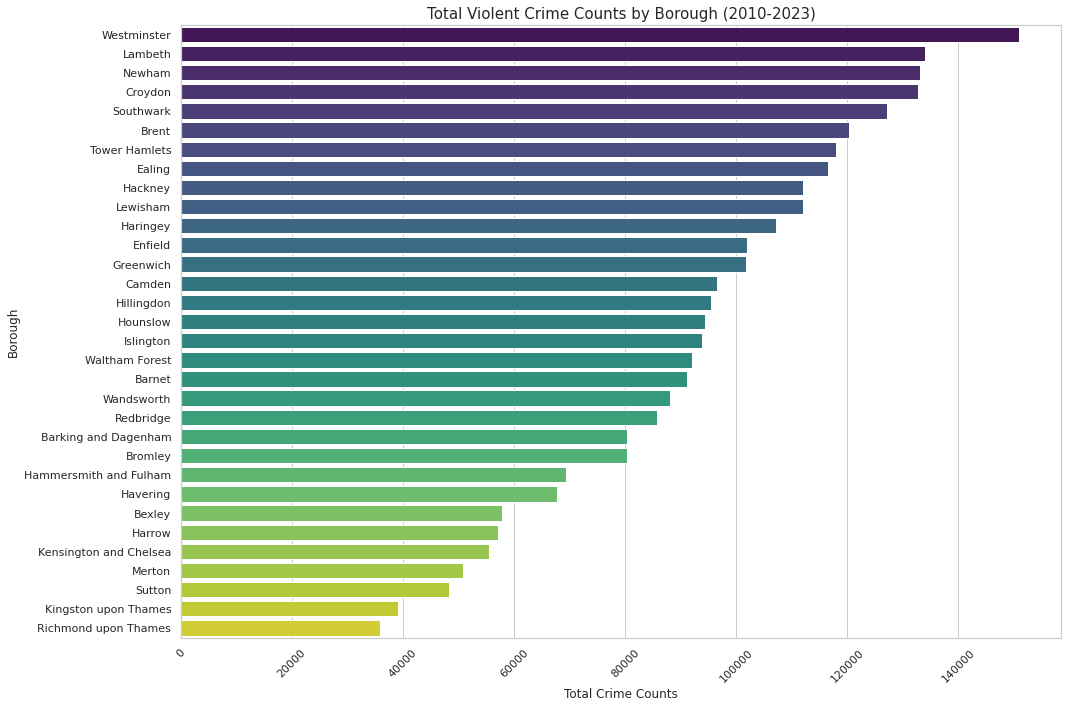

In [98]:
violent_crimes_data = df[df['Major Category'].isin([
    'Possession of Weapons', 'Robbery', 'Sexual Offences', 'Violence Against the Person'
])]


total_by_borough = violent_crimes_data.groupby('Borough').sum().sum(axis=1).sort_values(ascending=False)


sns.set_style("whitegrid")

# Bar Chart: Total violent crime counts by borough
plt.figure(figsize=(15, 10))
sns.barplot(y=total_by_borough.index, x=total_by_borough.values, palette="viridis")
plt.title('Total Violent Crime Counts by Borough (2010-2023)', fontsize=15)
plt.xlabel('Total Crime Counts', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()